In [10]:
from functions import Datasets, import_data, description, obliczanie_wieku, przedzialy_ufnosci_srednia, sprawdz_rozklad, porownaj_srednie
from functions import boxplot, line_plot, time_plot, bar_plot, plot_hist
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
print(Datasets())

Dostępne datasety: patient, region, weather


1. Pobranie danych 

In [13]:
patient = import_data(Datasets.patient)
region = import_data(Datasets.region)
weather = import_data(Datasets.weather)
patient_region = pd.merge(patient, region, how='inner', on=['province', 'city'])
patient_weather = pd.merge(patient, weather, how='inner', left_on=['confirmed_date', 'province'], right_on=['date', 'province'])

2. Dostępne kolumny

In [16]:
print(patient.columns)
print(region.columns)
print(weather.columns)
print(patient_region.columns)
print(patient_weather.columns)

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')
Index(['code', 'province', 'city', 'latitude', 'longitude',
       'elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count'],
      dtype='object')
Index(['code', 'province', 'date', 'avg_temp', 'min_temp', 'max_temp',
       'precipitation', 'max_wind_speed', 'most_wind_direction',
       'avg_relative_humidity'],
      dtype='object')
Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'release

3. Wyrysowanie histogramu dla wybranej kolumny - wskaż jeden DataFrame z (patient, region, weather)  
oraz numer kolumny 

/home/maciekg84/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/maciekg84/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


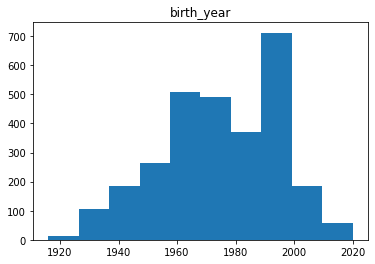

In [5]:
plot_hist(patient, column = patient.columns[3])

4. Przedstawienie podstawowych charakterystyk dla wybranej bazy - wskaż jeden DataFrame z (patient, region, weather)  

In [6]:
interact(description, x=[('patient', 'patient'), ('region', 'region'), ('weather', 'weather')])

interactive(children=(Dropdown(description='x', options=(('patient', 'patient'), ('region', 'region'), ('weath…

<function functions.description(x)>

5. Wyrysowanie boxplota dla wybranych kolumn - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny grupujacej oraz kolumne z wartosciami

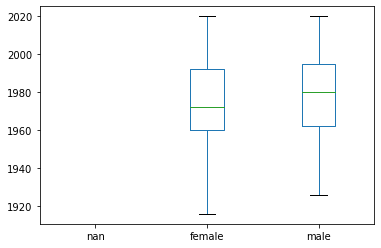

In [8]:
boxplot(patient, 'sex', 'birth_year')

6. Wyrysowanie wykresu liniowego dla wybranego przedzialu czasowego - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny z wartosciami oraz nazwe kolumny z datami. Opcjonalnie wybierz przedzial czasowy podajac argumenty start i end.

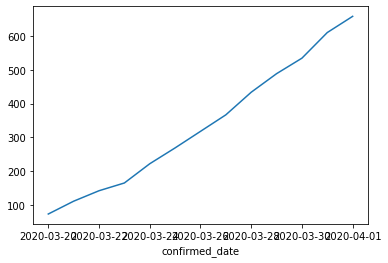

In [9]:
# Argumenty 'start', 'end' sa opcjonalne
time_plot(patient, 'patient_id', 'confirmed_date', start='2020-03-20', end='2020-04-01')

7. Wyrysowanie wykresu liniowego dla wybranych kolumn - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny dla osi x, nazwe kolumny grupujacej oraz koulmy z wartosciami. Opcjonalnie podaj wartosc agregatu (domyslnie ustawiony jako count)

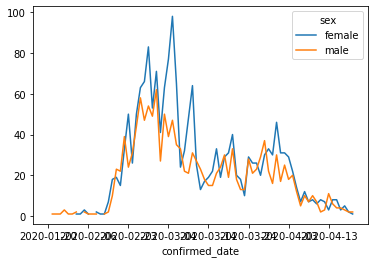

In [10]:
line_plot(patient, 'confirmed_date', 'sex', 'patient_id', 'count')

8. Wyrysowanie barplota dla wybranych kolumn - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny grupujacej oraz kolumne z wartosciami. Opcjonalnie podaj wartosc agregatu (domyslnie ustawiony jako count)

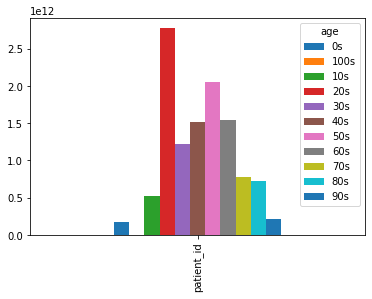

In [11]:
bar_plot(patient, 'age', 'patient_id', 'sum')

9. Obliczanie przedzialow ufnosci dla sredniej - wskaż jeden DataFrame z (patient, region, weather), podaj nazwe kolumny z wartosciami oraz poziom ufnosci

In [12]:
przedzialy_ufnosci_srednia(obliczanie_wieku(patient, 'birth_year'), 0.95)

/home/bartosz/Pulpit/kurs_ds/projekt-sql/jdsz5-outdated/python/functions.py:235: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  f = lambda x: pd.datetime.now().year - x


'Srednia: 45.04326756663205. Przedzialy ufnosci: 44.30361575190735, 45.782919381356756'

10. Sprawdź normalność rozkładu

/home/maciekg84/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/maciekg84/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/maciekg84/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


Dn = nan, p-value = nan, wartość p-value jest mniejsza od Dn
Wartość pvalue jest niższa od statystyki Dn - nie można uznać, że próba pochodzi z rozkładu normalnego


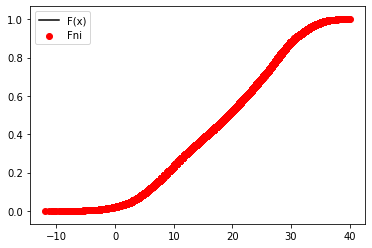

In [8]:
sprawdz_rozklad(weather.max_temp)

11. Przeprowadź test 2 średnich - ilość chorych (rok urodzenia z podziałem na płci) 

In [11]:
porownaj_srednie(patient.loc[patient.sex == 'female', 'birth_year'], patient.loc[patient.sex == 'male', 'birth_year'])

Wartość p-value 0.0 jest mniejsza niż wartość a 0.05
Istnieją przesłanki do odrzucenia hipotezy zerowej na rzecz alternatywnej - średnia mx jest niższa od średniej my
